# **Importing Libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully.")


Libraries imported successfully.



# **Data Loading**

In [ ]:
file_path = "/content/ELECTRICITY_SOLD_TO_ULTIMATE_CONSUMERS.xls"

# Load the datasets from different sheets of the Excel file
try:
    df_all_india = pd.read_excel(file_path, sheet_name="Sales to customers - All India")
    df_statewise = pd.read_excel(file_path, sheet_name="Sales to customers - statewise")
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading file: {e}")
except Exception as e:
    print(f"An unexpected error occurred while loading the data: {e}")

# Display first few rows to understand structure
print("\n--- All India Data Head ---")
df_all_india.head()


Datasets loaded successfully.

--- All India Data Head ---


,Year,Total sold to ultimate consumers,Domestic,Commercial,Industrial Power at low & medium voltage,Industrial Power at high voltage,Public lighting,Traction,Agriculture,Public water works & sewage pumping,Miscellaneous
0,2000-01,209216.92,75628.95,22544.66,28302.46,79319.13,3421.72,8213.46,84729.26,7043.52,7396.45
1,2001-02,214717.06,79694.38,24139.78,28160.03,79135.57,3587.30,8105.65,81673.39,7369.79,10593.44
2,2002-03,227726.01,83355.08,25437.25,30572.00,84386.76,3974.92,8796.91,84485.95,7898.70,10690.70
3,2003-04,360937.24,89735.78,28201.49,32815.40,91757.68,4426.10,9210.11,87089.25,9218.95,8482.49
4,2004-05,386133.66,95659.47,31381.23,32334.67,104354.58,4967.58,9495.33,88555.35,9618.49,8866.96


# **Data Cleaning & Preprocessing**

In [ ]:
def clean_currency_columns(df):
    """
    Cleans columns that might contain non-numeric characters like '-' or ','.
    Converts them to numeric float type.
    """
    df_clean = df.copy()

    # Identify object columns that should be numeric
    # We exclude the first column usually (Year or State Name)
    for col in df_clean.columns[1:]:
        if df_clean[col].dtype == 'object':
            # Replace hyphens with 0, remove commas, and convert to numeric
            df_clean[col] = df_clean[col].astype(str).str.replace('-', '0')
            df_clean[col] = df_clean[col].str.replace(',', '')
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

    return df_clean

# Clean both datasets
df_all_india_clean = clean_currency_columns(df_all_india)
df_statewise_clean = clean_currency_columns(df_statewise)

# Ensure Year is treated as string/categorical for the All India dataset
df_all_india_clean['Year'] = df_all_india_clean['Year'].astype(str)

print("Data cleaning complete.")
print(df_all_india_clean.info())


Data cleaning complete.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       9 non-null      object 
 1   Total sold to ultimate  consumers          9 non-null      float64
 2   Domestic                                   9 non-null      float64
 3   Commercial                                 9 non-null      float64
 4   Industrial  Power at low & medium voltage  9 non-null      float64
 5   Industrial  Power at high  voltage         9 non-null      float64
 6   Public lighting                            9 non-null      float64
 7   Traction                                   9 non-null      float64
 8   Agriculture                                9 non-null      float64
 9   Public water works & sewage pumping        9 non-null      float64
 10  Miscel

We define '**Churn**' in this context as year-over-year NEGATIVE growth
in **electricity consumption** for a specific sector.

In [ ]:
# We define 'Churn' in this context as year-over-year NEGATIVE growth
# in electricity consumption for a specific sector.

# Set Year as index for easy calculation
df_growth = df_all_india_clean.set_index('Year').copy()

# Calculate Percentage Change (Growth Rate)
# Formula: ((Current_Year - Previous_Year) / Previous_Year) * 100
df_pct_change = df_growth.pct_change() * 100

# Drop the first row (NaN) as it has no previous year to compare
df_pct_change = df_pct_change.dropna()

print("\n--- Year-over-Year Growth Rates (%) ---")
df_pct_change.head()


--- Year-over-Year Growth Rates (%) ---


,Total sold to ultimate consumers,Domestic,Commercial,Industrial Power at low & medium voltage,Industrial Power at high voltage,Public lighting,Traction,Agriculture,Public water works & sewage pumping,Miscellaneous
Year,,,,,,,,,,
2001-02,2.628917,5.375494,7.075378,-0.503242,-0.231420,4.839087,-1.312602,-3.606629,4.632201,43.223303
2002-03,6.058648,4.593423,5.374821,8.565225,6.635689,10.805341,8.528125,3.443668,7.176731,0.918115
2003-04,58.496274,7.654842,10.866898,7.338087,8.734688,11.350669,4.697104,3.081341,16.714776,-20.655429
2004-05,6.980831,6.601258,11.275078,-1.464952,13.728442,12.233795,3.096814,1.683445,4.333899,4.532513
2005-06,6.669522,4.631690,14.605419,6.204857,12.324567,4.218956,4.724006,1.961542,6.650316,-2.967872


**This heatmap identifies sectors that are "churning" (shrinking

*   List item
*   List item

demand).**
**Red/Orange = Negative Growth (Churn). Green = Positive Growth**.

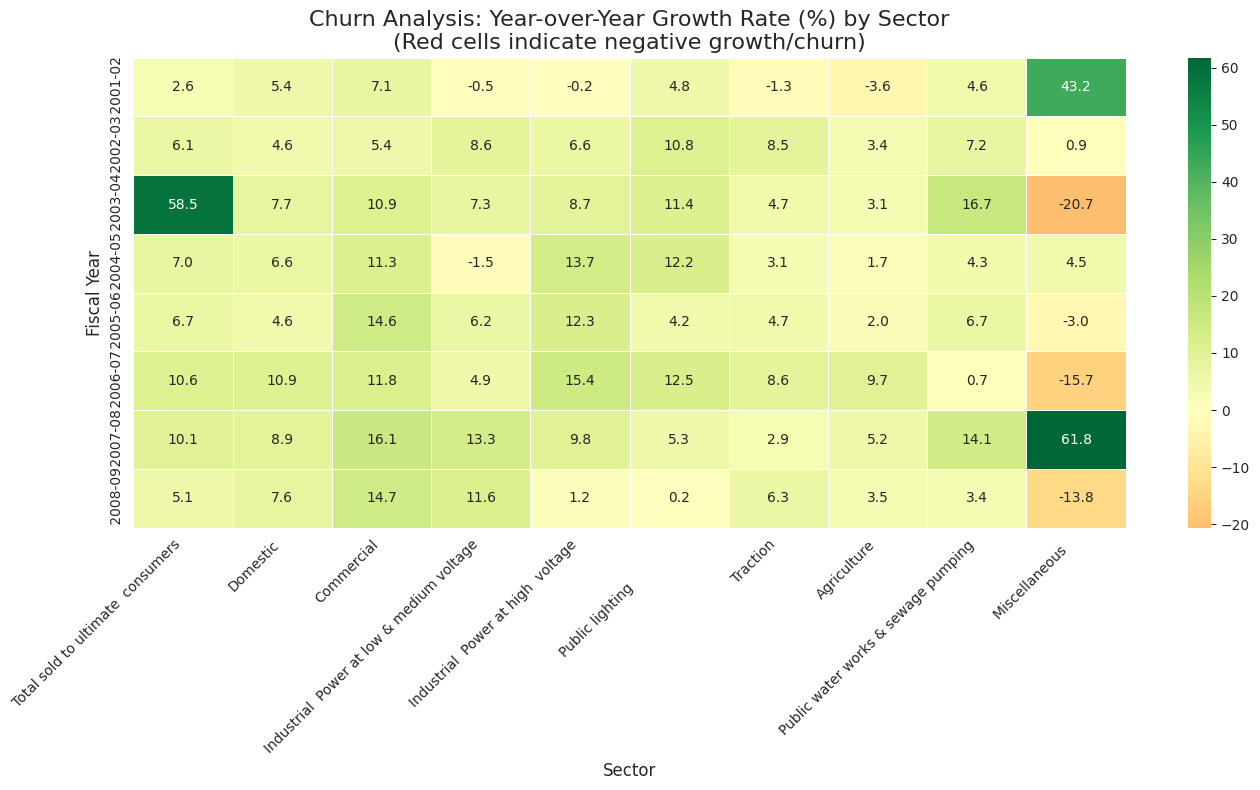

In [ ]:
# This heatmap identifies sectors that are "churning" (shrinking demand).
# Red/Orange = Negative Growth (Churn). Green = Positive Growth.

plt.figure(figsize=(14, 8))
sns.heatmap(df_pct_change,
            annot=True,
            fmt=".1f",
            cmap="RdYlGn",
            center=0,
            linewidths=.5)

plt.title('Churn Analysis: Year-over-Year Growth Rate (%) by Sector\n(Red cells indicate negative growth/churn)', fontsize=16)
plt.ylabel('Fiscal Year', fontsize=12)
plt.xlabel('Sector', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

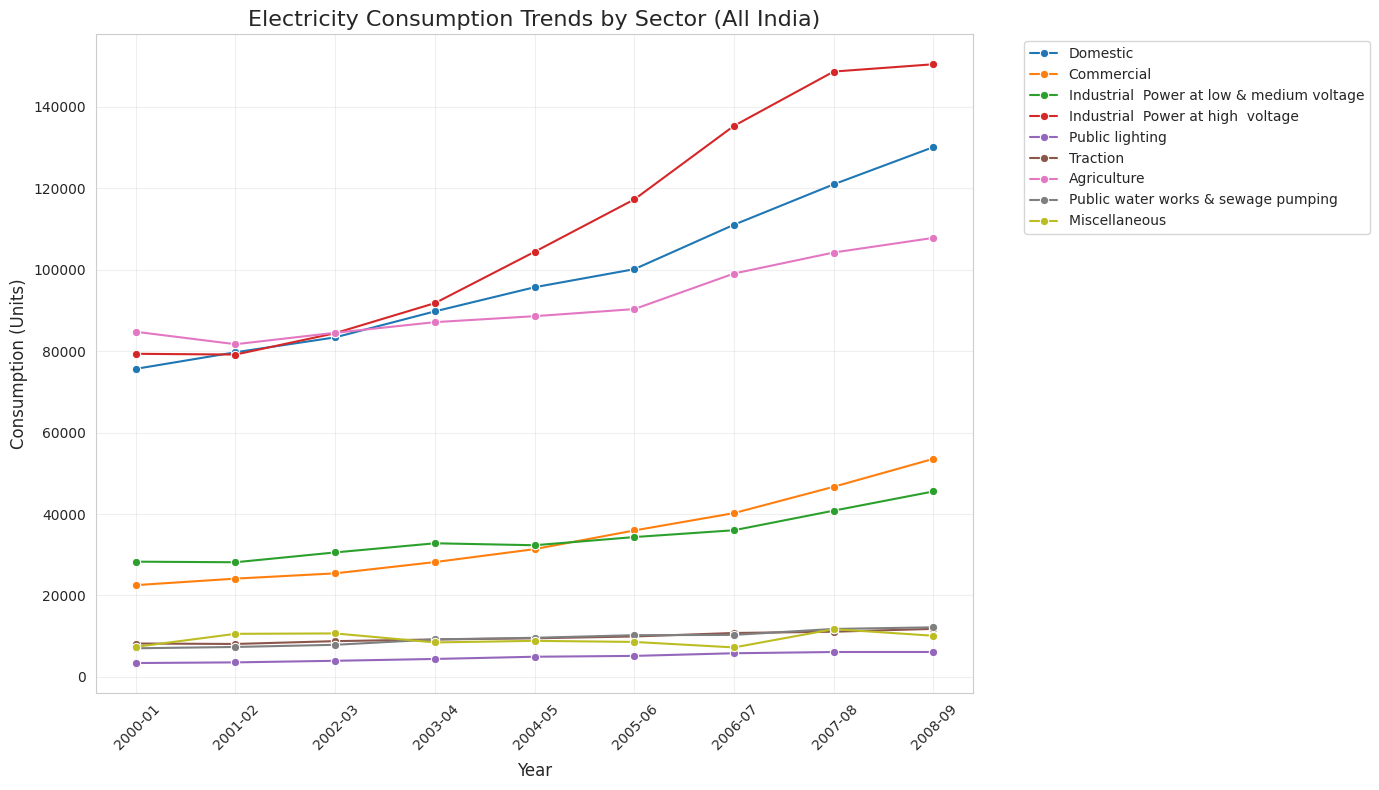

In [ ]:
# Analyzing the absolute trend to see if churn is temporary or systemic.

# Melt the dataframe for plotting with Seaborn
df_melted = df_all_india_clean.melt(id_vars=['Year'], var_name='Sector', value_name='Consumption')

# Filter out the 'Total' column to avoid skewing the scale
df_melted_sectors = df_melted[~df_melted['Sector'].str.contains('Total')]

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted_sectors, x='Year', y='Consumption', hue='Sector', marker='o')

plt.title('Electricity Consumption Trends by Sector (All India)', fontsize=16)
plt.ylabel('Consumption (Units)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

/tmp/ipython-input-1064053897.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states, x='Calculated_Total', y='State/ Union Territory', palette='viridis')


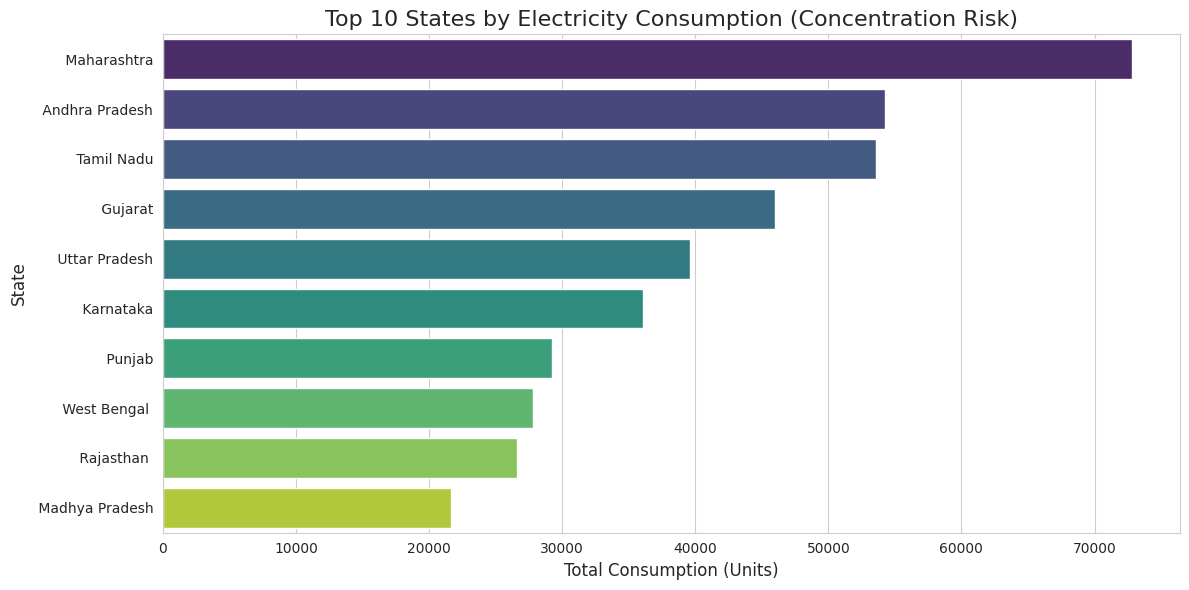

In [ ]:
# Identifying which states hold the most demand.
# High churn in these states would impact the national grid significantly.

# Calculate Total Consumption per State (if 'Total' column is missing or to verify)
# We sum all columns from index 2 onwards (skipping Name and Total if present)
numeric_cols = df_statewise_clean.select_dtypes(include=[np.number]).columns
# Ensure we don't sum the 'Total' column itself if it exists, let's recalculate it to be safe
cols_to_sum = [c for c in numeric_cols if 'Total' not in c]
df_statewise_clean['Calculated_Total'] = df_statewise_clean[cols_to_sum].sum(axis=1)

# Sort and take top 10
top_10_states = df_statewise_clean.sort_values('Calculated_Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_states, x='Calculated_Total', y='State/ Union Territory', palette='viridis')

plt.title('Top 10 States by Electricity Consumption (Concentration Risk)', fontsize=16)
plt.xlabel('Total Consumption (Units)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()

plt.show()

In [ ]:
print("\n--- Automated Churn Insights ---")

# 1. Identify sectors with the highest average churn (lowest average growth)
avg_growth = df_pct_change.mean().sort_values()
print(f"Sector with lowest average growth: {avg_growth.index[0]} ({avg_growth.iloc[0]:.2f}%)")

# 2. Identify the year with the most volatility
# We calculate standard deviation of growth rates across sectors for each year
year_volatility = df_pct_change.std(axis=1).sort_values(ascending=False)
print(f"Year with highest volatility (churn risk): {year_volatility.index[0]}")

# 3. Specific Churn Events (Growth < -5%)
print("\nSignificant Churn Events (Decline > 5%):")
churn_events = df_pct_change[df_pct_change < -5].stack()
for (year, sector), value in churn_events.items():
    print(f" - {year}: {sector} declined by {value:.2f}%")


--- Automated Churn Insights ---
Sector with lowest average growth: Agriculture (3.11%)
Year with highest volatility (churn risk):  2003-04

Significant Churn Events (Decline > 5%):
 -  2003-04: Miscellaneous   declined by -20.66%
 -  2006-07: Miscellaneous   declined by -15.68%
 -  2008-09: Miscellaneous   declined by -13.78%


In [ ]:
df_all_india.head()


,Year,Total sold to ultimate consumers,Domestic,Commercial,Industrial Power at low & medium voltage,Industrial Power at high voltage,Public lighting,Traction,Agriculture,Public water works & sewage pumping,Miscellaneous
0,2000-01,209216.92,75628.95,22544.66,28302.46,79319.13,3421.72,8213.46,84729.26,7043.52,7396.45
1,2001-02,214717.06,79694.38,24139.78,28160.03,79135.57,3587.30,8105.65,81673.39,7369.79,10593.44
2,2002-03,227726.01,83355.08,25437.25,30572.00,84386.76,3974.92,8796.91,84485.95,7898.70,10690.70
3,2003-04,360937.24,89735.78,28201.49,32815.40,91757.68,4426.10,9210.11,87089.25,9218.95,8482.49
4,2004-05,386133.66,95659.47,31381.23,32334.67,104354.58,4967.58,9495.33,88555.35,9618.49,8866.96


In [ ]:
df_statewise.head()

,State/ Union Territory,Total sold to ultimate consumers,Domestic,Commercial,Industrial Power at low & medium voltage,Industrial Power at high voltage,Public lighting,Traction,Agriculture,Public water works & sewage pumping,Miscellaneous
0,Andhra Pradesh,54241.14,11674.85,3884.58,3102.00,14410.99,1619.03,1414.35,16604.57,809.38,721.39
1,Arunachal Pradesh,271.47,97.00,29.00,45.00,71.47,17.00,-,-,12,-
2,Assam,2797.60,1073.97,386.55,64.35,859.04,6.69,-,20.86,39.04,347.1
3,Bihar,4984.06,1768.27,414.11,161.84,1269.14,22.91,399.76,798,150.03,-
4,Chhattisgarh,12021.45,2183.28,406.77,400.69,5205.3,59.56,711.06,2049.93,106.66,898.2


In [ ]:
# --- PROCESSING 1: ALL INDIA (TIME SERIES & CHURN) ---

# Melt the data (Unpivot) to make it "Long Format" (Best for Power BI)
# We keep 'Year' fixed and turn all sector columns into rows
df_india_melted = df_all_india.melt(id_vars=['Year'], var_name='Sector', value_name='Consumption')

# Sort to ensure calculations are correct
df_india_melted = df_india_melted.sort_values(by=['Sector', 'Year'])

# Calculate Year-over-Year Growth (Churn Indicator)
# We group by Sector so growth is calculated per sector, not across them
df_india_melted['Growth_Pct'] = df_india_melted.groupby('Sector')['Consumption'].pct_change() * 100

# Create a clear "Churn Flag" for Power BI coloring
# 1 = Churn (Negative Growth), 0 = Safe
df_india_melted['Is_Churn'] = df_india_melted['Growth_Pct'].apply(lambda x: 1 if x < 0 else 0)
df_india_melted['Churn_Status'] = df_india_melted['Growth_Pct'].apply(lambda x: "Declining" if x < 0 else "Growing")

# Fill NaN values (first year has no growth)
df_india_melted['Growth_Pct'] = df_india_melted['Growth_Pct'].fillna(0)

# Save the processed time-series file
df_india_melted.to_csv('powerbi_growth_data.csv', index=False)
print(f"Created 'powerbi_growth_data.csv' with {len(df_india_melted)} rows.")

Created 'powerbi_growth_data.csv' with 90 rows.
